In [1]:
from extract_desserts import *
from pattern.text.en import singularize
from nltk import FreqDist
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(seed=2019)

import gensim
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',
                    datefmt='%H:%M:%S',
                   level=logging.INFO)

from time import time
import multiprocessing

In [2]:
#load the raw data
# lets use the default value that only loads 250 recipes,
# instead of 1 million
raw_data = get_raw_data()
raw_ingredients = get_raw_ingredients()

Loading file  ../data/sample_layer1.json
Loading ingredient file: ../data/sample_det_ingrs.json


In [3]:
print('N recipes: {}\t N list of ingredients: {}'.format(len(raw_data),
      len(raw_ingredients)))


N recipes: 20000	 N list of ingredients: 20000


In [4]:
## get a list of desserts only
desserts, dessert_ings = find_desserts(raw_data, raw_ingredients)#,test_id='02916fd389')


['fish', 'salmon', 'tuna', 'chicken', 'turkey', 'garlic', 'onion', 'lamb', 'sausage', 'shrimp', 'beef', 'taco', 'shallot', 'veal', 'pork', 'mincemeat', 'crab', 'filet', 'chipotle', 'panceta', 'asparagus', 'parsley', 'mushroom', 'sardines', 'olives']


In [5]:
total_recipes = len(raw_data)
dessert_recipes = len(desserts)
dessert_ingredients = len(dessert_ings)
print('Will look at {} dessert recipes, out of {} (~{:1.1f}%)'.format(
                            dessert_recipes, total_recipes,
                            dessert_recipes/total_recipes*100))

Will look at 4096 dessert recipes, out of 20000 (~20.5%)


In [106]:
def clean_dessert_ingredients(all_ingredients):
    count =0
    for item, ingredients_list in enumerate(all_ingredients):
        to_remove = []
        for ingr_item, ingredient in enumerate(ingredients_list['ingredients']):
            tmp_ingredient = ingredient['text'].lower().replace(' - ','-')
            tmp_ingredient = tmp_ingredient.replace("'",'')
#             tmp_ingredient = singularize(tmp_ingredient)
            
#             print(ingredient['text'].replace(' - ','-'))
            if re.search('water', tmp_ingredient) and not re.search('watermelon',tmp_ingredient) and not re.search('rose water',tmp_ingredient):
                to_remove.append(ingr_item)
            
            if re.search('vanilla extract', tmp_ingredient):
                tmp_ingredient='vanilla extract'

            elif re.search('purpose flour', tmp_ingredient) or re.search('cake flour',tmp_ingredient) or re.search('rising flour', tmp_ingredient):
                tmp_ingredient = 'flour' 
            elif re.search('brown sugar', tmp_ingredient) or re.search('demerara sugar', tmp_ingredient):
                tmp_ingredient = 'brown sugar'
            elif re.search('powdered sugar', tmp_ingredient) or re.search('confectioners sugar',tmp_ingredient) :
                tmp_ingredient ='powdered sugar'
            if not re.search('flour', tmp_ingredient) and not re.search('molasses',tmp_ingredient):
                tmp_ingredient = singularize(tmp_ingredient)


            all_ingredients[item]['ingredients'][ingr_item]['text'] = tmp_ingredient
            
        if len(to_remove)>0:
            
            to_remove.sort(reverse=True)
            
                
#             print(item,'to remove', to_remove)
            for i in to_remove:
#                 print('try to remove', all_ingredients[item]['ingredients'][i])
                del all_ingredients[item]['ingredients'][i]
#         for iremove in to_remove:
#             del all_ingredients
#         print('--------------------------')
        if item%250==0:
            logging.info("read {0} recipes".format(item))
    return all_ingredients

def print_dessert_ingredients(all_ingredients):
    count =0
    for item, ingredients_list in enumerate(all_ingredients):
        for ingr_item, ingredient in enumerate(ingredients_list['ingredients']):
            
            
            print(ingredient['text'])
        
        print('--------------------------')
        if item==50:
            break
    return all_ingredients

In [107]:
clean_ingredients =  clean_dessert_ingredients(dessert_ings);
# print_dessert_ingredients(clean_ingredients)
# print(dessert_ings)


23:28:18 : INFO : read 0 recipes
23:28:18 : INFO : read 250 recipes
23:28:18 : INFO : read 500 recipes
23:28:19 : INFO : read 750 recipes
23:28:19 : INFO : read 1000 recipes
23:28:19 : INFO : read 1250 recipes
23:28:19 : INFO : read 1500 recipes
23:28:19 : INFO : read 1750 recipes
23:28:19 : INFO : read 2000 recipes
23:28:19 : INFO : read 2250 recipes
23:28:19 : INFO : read 2500 recipes
23:28:19 : INFO : read 2750 recipes
23:28:20 : INFO : read 3000 recipes
23:28:20 : INFO : read 3250 recipes
23:28:20 : INFO : read 3500 recipes
23:28:20 : INFO : read 3750 recipes
23:28:20 : INFO : read 4000 recipes


In [89]:
to_remove = [1, 9, 2]
to_remove.sort(reverse=True)
for i in to_remove:
    print(i)
to_remove.sort(reverse=True)
print(to_remove)

9
2
1
[9, 2, 1]


In [46]:
dessert_ings[1288];
clean_ingredients[2038]

{'valid': [False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True],
 'id': '0271c03778',
 'ingredients': [{'text': '2 packages yeast, 0.25 ounce packages, dissolved in the below amount of cup lukewarm water'},
  {'text': 'water'},
  {'text': 'sugar'},
  {'text': 'shortening'},
  {'text': 'salt'},
  {'text': 'hot water'},
  {'text': 'flour'},
  {'text': 'egg'},
  {'text': 'yellow cake mix'},
  {'text': 'butter'},
  {'text': 'brown sugar'},
  {'text': 'yellow cake mix'},
  {'text': 'cinnamon'},
  {'text': 'candy sprinkle'},
  {'text': 'butter'},
  {'text': 'yellow cake mix'},
  {'text': 'vanilla extract'},
  {'text': 'powdered sugar'},
  {'text': 'milk'}]}

In [6]:
# item = np.random.randint(dessert_recipes)
# print(item, dessert_ings[item]['valid'])
# dessert_ings[item]['ingredients']

In [10]:
m = re.match('onion', 'yellow onions' )
print(m)

m = re.search('onion', 'yellow onions' )
print(m)

None
<re.Match object; span=(7, 12), match='onion'>


# Let's look at the unique words

In [6]:
spices =['sugar','salt','water','baking soda','baking powder','flour', 'vegetable oil',
        'olive oil', 'cornstarch','nutmeg','white sugar','powdered sugar', 'brown sugar',
        'margarine','oil','shortening','kosher salt',"confectioners' sugar",'icing sugar',
        'canola oil','pepper' ,'low - fat milk','light corn syrup','cooking spray', 
         'corn syrup','vegetable shortening']

In [9]:
item=0
len(dessert_ings),len(dessert_ings[item]['ingredients'])

(4659, 5)

## Lets create a list of ingredients
And we will us it as an input to word2Vec

In [30]:
all_dingredients = []
count =0
for drecipe in dessert_ings:
    ings =[]
    for entry in drecipe['ingredients']:
        ings.append(entry['text'])
    all_dingredients.append(ings)
    count += 1
    if count%500==0:
        logging.info("read {0} ingredients".format(count))

#         break;

# print(all_dingredients)

22:02:30 : INFO : read 500 ingredients
22:02:30 : INFO : read 1000 ingredients
22:02:30 : INFO : read 1500 ingredients
22:02:30 : INFO : read 2000 ingredients
22:02:30 : INFO : read 2500 ingredients
22:02:30 : INFO : read 3000 ingredients
22:02:30 : INFO : read 3500 ingredients
22:02:30 : INFO : read 4000 ingredients


## Create a Word2Vec model training on the ingredients. 


In [7]:
vec_size = 100;
model = gensim.models.Word2Vec(
   # all_dingredients,
    size=vec_size,
    window=5,
    min_count=20,
    workers=10,
    alpha=0.02,
    iter=10,
    sg=1)

In [8]:
t = time()
model.build_vocab(all_dingredients, progress_per=1000)

21:15:40 : INFO : collecting all words and their counts
21:15:40 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
21:15:40 : INFO : PROGRESS: at sentence #1000, processed 8960 words, keeping 1387 word types
21:15:40 : INFO : PROGRESS: at sentence #2000, processed 17990 words, keeping 2029 word types
21:15:40 : INFO : PROGRESS: at sentence #3000, processed 26711 words, keeping 2570 word types
21:15:40 : INFO : PROGRESS: at sentence #4000, processed 35887 words, keeping 3059 word types
21:15:40 : INFO : collected 3118 word types from a corpus of 37105 raw words and 4132 sentences
21:15:40 : INFO : Loading a fresh vocabulary
21:15:40 : INFO : min_count=20 retains 214 unique words (6% of original 3118, drops 2904)
21:15:40 : INFO : min_count=20 leaves 29459 word corpus (79% of original 37105, drops 7646)
21:15:40 : INFO : deleting the raw counts dictionary of 3118 items
21:15:40 : INFO : sample=0.001 downsamples 71 most-common words
21:15:40 : INFO : downsampling 

In [9]:
model.train(all_dingredients, total_examples=model.corpus_count,
           epochs=20, report_delay=1)

21:15:45 : INFO : training model with 10 workers on 214 vocabulary and 100 features, using sg=1 hs=0 sample=0.001 negative=5 window=5
21:15:45 : INFO : worker thread finished; awaiting finish of 9 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 8 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 7 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 6 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 5 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 4 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 3 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 2 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 1 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 0 more threads
21:15:45 : INFO : EPOCH - 1 : training on 37105 raw words (13515 effective words) took 0.0s, 428688 effect

21:15:45 : INFO : worker thread finished; awaiting finish of 6 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 5 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 4 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 3 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 2 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 1 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 0 more threads
21:15:45 : INFO : EPOCH - 10 : training on 37105 raw words (13730 effective words) took 0.0s, 652820 effective words/s
21:15:45 : INFO : worker thread finished; awaiting finish of 9 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 8 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 7 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 6 more threads
21:15:45 : INFO : worker thread finished; awa

21:15:45 : INFO : worker thread finished; awaiting finish of 2 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 1 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 0 more threads
21:15:45 : INFO : EPOCH - 19 : training on 37105 raw words (13690 effective words) took 0.0s, 539064 effective words/s
21:15:45 : INFO : worker thread finished; awaiting finish of 9 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 8 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 7 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 6 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 5 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 4 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 3 more threads
21:15:45 : INFO : worker thread finished; awaiting finish of 2 more threads
21:15:45 : INFO : worker thread finished; awa

(273348, 742100)

In [11]:
model.init_sims(replace=True)

21:15:55 : INFO : precomputing L2-norms of word weight vectors


In [13]:
w1='almonds'
w1='water'
model.wv.most_similar(positive=w1, topn=4)

[('skim milk', 0.8660790920257568),
 ('dry yeast', 0.8642836809158325),
 ('cranberries', 0.8593516945838928),
 ('bread', 0.851582944393158)]

In [14]:
w1='rum'
model.wv.most_similar(positive=['apples','banana'],
                      negative=['water'],topn=10)

[('dates', 0.8782709836959839),
 ('pumpkin', 0.8454946279525757),
 ('canned pumpkin', 0.8299166560173035),
 ('carrots', 0.8166115283966064),
 ('pumpkin pie spice', 0.8032814264297485),
 ('rolled oats', 0.8018128871917725),
 ('raisins', 0.7987691760063171),
 ('brown sugar', 0.7884279489517212),
 ('apple juice', 0.7806726694107056),
 ('nuts', 0.7713814973831177)]

In [82]:
# witem = model.wv.__getitem__(['ginger'])
# witem[0]

In [15]:
model.wv.doesnt_match(['apples','butter','banana',
                       'rum','flour'])

/anaconda3/lib/python3.7/site-packages/gensim/models/keyedvectors.py:730: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'butter'

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [19]:
def tsne_scatterplot(model, word, list_names):
    # create an array with the same size as the vector
    arrays = np.empty((0,vec_size), dtype='f')
    # set the original word,     
    word_labels = [word]
    color_list = ['red']
    # append the vector for the test word
    arrays = np.append(arrays, model.wv.__getitem__([word]),axis=0)
    
    ####### get the closest words and make then blue
    #get a list of the most similar words
    close_words = model.wv.most_similar([word])
    
    for word_score in close_words:
        # for each word get the vector  
        word_vector = model.wv.__getitem__([word_score[0]])
        # get the name
        word_labels.append(word_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, word_vector, axis=0)
     
    # get the words passed in the third entry and 
    # get those vectors, and set the color as green
    for wrd in list_names:
        word_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, word_vector, axis=0)
        
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, 
             perplexity=15).fit_transform(reduc)
    df = pd.DataFrame({'x':[x for x in Y[:, 0]],
                       'y':[y for y in Y[:,1]],
                      'words':word_labels,
                      'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(8,6)
    
    p1 = sns.regplot(data=df, 
                    x='x',y='y',fit_reg=False,
                    marker='x',
                    scatter_kws={'s':40,
                                'facecolors':df['color']})
    
    for line in range(df.shape[0]):
        p1.text(df['x'][line],df['y'][line],
               '  '+df['words'][line].title(),
               horizontalalignment='left',
                verticalalignment='bottom',size='large',
                color=df['color'][line],weight='normal'
               ).set_size(10)
        
    plt.xlim(Y[:,0].min()-50, Y[:,0].max() + 50)
    plt.ylim(Y[:,1].min()-50, Y[:,1].max() + 50)
    
    plt.title('t-SNE visualization for {}'.format(word.title()))

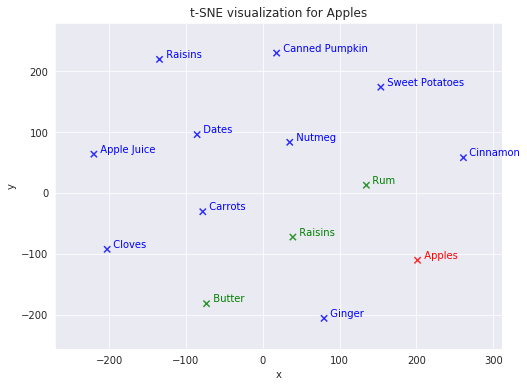

In [20]:
tsne_scatterplot(model, 'apples', ['butter','rum','raisins'])

In [21]:
test_word = 'water'

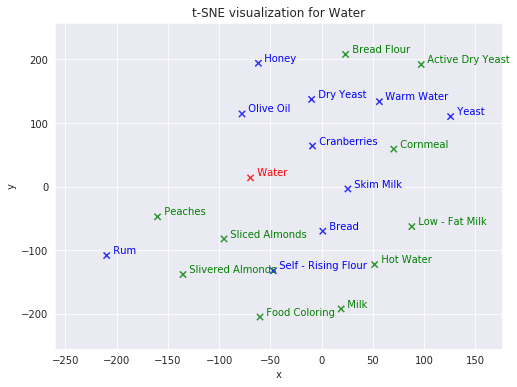

In [22]:
tsne_scatterplot(model, test_word, [t[0] for t in model.wv.most_similar(positive=[test_word], topn=20)][10:])

## look at unique values

In [44]:
import re

spice_list = ['sugar','salt','water','baking soda','baking powder','flour', 'oil',
         'cornstarch','sugar','margarine','shortening','pepper' ,'milk','light corn syrup','cooking spray', 
         'corn syrup', 'butter']

def is_it_an_ingredient(ingredient):
    for spice in spice_list:
        if re.search(spice, ingredient):
#             print( ingredient,' -> ingredient is a spice')
            return False, spice
#     print('Did not find ingredient in the list of spices')    
    return True, ingredient

In [108]:
# create bag of ingredients

all_ingredients = []

for recipe_ings in clean_ingredients:# dessert_ings:
    n_ingredients = len(recipe_ings['valid'])
    for item, ingredient in enumerate(recipe_ings['ingredients']):
#         if recipe_ings['valid'][item] ==True:
        ingred = ingredient['text'].lower()
#             ingred = singularize(ingred)
#             if ingred=='eggs':
#                 ingred='egg'
#             elif 'butter' in ingred:
#                 ingred = 'butter'
            
#             elif ingred == 'granulated sugar':
#                 ingred= 'sugar'
#             elif 'flour' in ingred:
#                 ingred = 'flour'
#             elif ingred == 'all - purpose flour' or ingred == 'cake flour':
#                 ingred = 'flour'
#             elif ingred == 'boiling water' or  ingred=='cold water':
#                 ingred = 'water'
#             elif ingred== 'light brown sugar' or ingred == 'dark brown sugar':
#                 ingred = 'sugar'
#             elif ingred == 'vanilla extract' or ingred == 'pure vanilla extract':
#                 ingred = 'vanilla'
#             elif ingred == 'fresh lemon juice':
#                 ingred = 'lemon juice'
            # find if ingredient belongs to a spice list

    
###             an_ingredient, ingred = is_it_an_ingredient(ingred)
###             if an_ingredient:
                # make it singular
                
###                 ingred = singularize(ingred)
        all_ingredients.append(ingred)
                
#             if ingred not in spices:
#                 all_ingredients.append(ingred)
            

In [109]:

### Funciton to retrieve reciepes given an ingredient list

def get_recipes_for_ingredients(search_list, ingredients_list, recipe_list):
    """
    Function to look for a recipe with all the ingredients in  the list passed
    
    Output:
        List of ingredients.
    """
    
    found_recipe_list = []
    found_ingredient_list = []
    for item,recipe_ingrs in enumerate(ingredients_list):
        temp_ingr_list = []
        ingredients = recipe_ingrs['ingredients']
        n_ingredients = len(ingredients)
        found_ingredient =0
        for ingredient in ingredients:
            if re.search(search_list[0], ingredient['text']):
                found_ingredient=1
            temp_ingr_list.append(ingredient['text'])

        # find all elements in the list
#         result = all(elem in temp_ingr_list for elem in search_list)
        # find any elements in the list
        result = any(singularize(elem) in temp_ingr_list for elem in search_list)
        
        
        if result or found_ingredient==1:
            found_recipe_list.append(recipe_list[item])
            found_ingredient_list.append(temp_ingr_list)
#             print('adding item', item)
           
    
    
    
    return found_recipe_list, found_ingredient_list
    

In [59]:
ingredient_set = set(all_ingredients)
print('with {} recipes, there are {} ingredients, and {} unique ingredients.'.format(
                dessert_recipes, len(all_ingredients), len(ingredient_set)))

with 4096 recipes, there are 36826 ingredients, and 2930 unique ingredients.


In [110]:
ingredient_set = set(all_ingredients)
print('with {} recipes, there are {} ingredients, and {} unique ingredients.'.format(
                dessert_recipes, len(all_ingredients), len(ingredient_set)))

with 4096 recipes, there are 35879 ingredients, and 2908 unique ingredients.


In [111]:
fdist = FreqDist(all_ingredients)
print(fdist)

<FreqDist with 2908 samples and 35879 outcomes>


In [112]:
common = fdist.most_common(2500)

In [33]:
# common
f= open("words.txt","w+")
for cc in common:
    f.write('{}: \t {}\n'.format(cc[0], cc[1]))

In [120]:
common[-50:]

[('1 envelope dream whip', 1),
 ('1 german choc. mix', 1),
 ('2 cans evaporated milk', 1),
 ('peppermint ice cream', 1),
 ('chocolate crumb pie shell', 1),
 ('imitation maple flavor', 1),
 ('1- 3/4 cup unbleached all purpose or bread flour, or more as needed', 1),
 ('chocolate graham wafer pie crust', 1),
 ('1 pound, 1-23 ounces, weight raspberry', 1),
 ('1 cup, 4 tablespoons, 3/4 teaspoons, 1-78 pinches double cream (whipping cream)',
  1),
 ('1 can sweetened condensed milk (397g can)', 1),
 ('2 packages marias crushed biscuit', 1),
 ('2 packages cream cheese of your choice', 1),
 ('1 springform pan to arm the pay', 1),
 ('peach jell-o', 1),
 ('bologna', 1),
 ('red wine vinegar', 1),
 ('1 box reduced-fat vanilla wafer', 1),
 ('bell pepper', 1),
 ('1 box no sugar needed pectin', 1),
 ('reduced-sugar yellow cake mix', 1),
 ('egg white powder', 1),
 ('6 cups thinly sliced peeled apples king soopers 1 lb for $0.87 thru 02/09',
  1),
 ('stevia powder', 1),
 ('1 box betty crocker angle food

In [116]:
found_lists, found_ingredients = get_recipes_for_ingredients(['oleo'], dessert_ings,desserts)
print('found {} recipes'.format(len(found_lists)))

for item, rec in enumerate(found_lists):
    print('{}\t{}'.format(item, rec['title']))

found 2 recipes
0	Candy Cane Cookies
1	Delightful 4 Layer Dessert


In [117]:
item = 0
found_lists[item],found_ingredients[item]

({'ingredients': [{'text': '1 cup oleo, softened'},
   {'text': '1 cup powdered sugar, measured then sifted'},
   {'text': '1 egg'},
   {'text': '1 12 teaspoons almond extract'},
   {'text': '1 teaspoon vanilla'},
   {'text': '2 12 cups flour, measured then sifted'},
   {'text': '1 teaspoon salt'},
   {'text': 'peppermint candy, crushed (optional)'},
   {'text': 'unbleached cane sugar (optional)'}],
  'url': 'http://www.food.com/recipe/candy-cane-cookies-273492',
  'partition': 'train',
  'title': 'Candy Cane Cookies',
  'id': '005b472428',
  'instructions': [{'text': 'Heat oven to 375F.'},
   {'text': 'Mix oleo, egg, almond extract, vanilla and powdered sugar together.'},
   {'text': 'In separate bowl, combine flour & salt.'},
   {'text': 'Slowly add to creamed mixture.'},
   {'text': 'Divide dough add red food coloring to one half.'},
   {'text': 'Take 1 tsp of each color.'},
   {'text': 'Roll each into 4 1/2 inch strips.'},
   {'text': 'Lay next to each other, roll once or twice to 

In [26]:
test = 'onio'

for ingr in found_ingredients[82]:
    if re.match(test, ingr):
        print('----> found a',test, ingr)
    else:
        print(ingr)

shrimp
butter
cream cheese
chili sauce
lemon juice
----> found a onio onion
celery rib


In [46]:
test_ingredients = []
for ingred in dessert_ings[2029]['ingredients']:
    test_ingredients.append(ingred['text'])
print(test_ingredients)

['butter', 'brown sugar', 'eggs', 'vanilla', 'canned pumpkin', 'sweet rice flour', 'potato starch', 'buckwheat flour', 'baking powder', 'salt', 'cinnamon', 'nutmeg', 'cloves', 'ginger', 'raisins']


In [59]:
food_pattern = 'flourish'
# for ing in test_ingredients:
m = re.search(food_pattern, 'vanilla and flour don')
print(m)

None


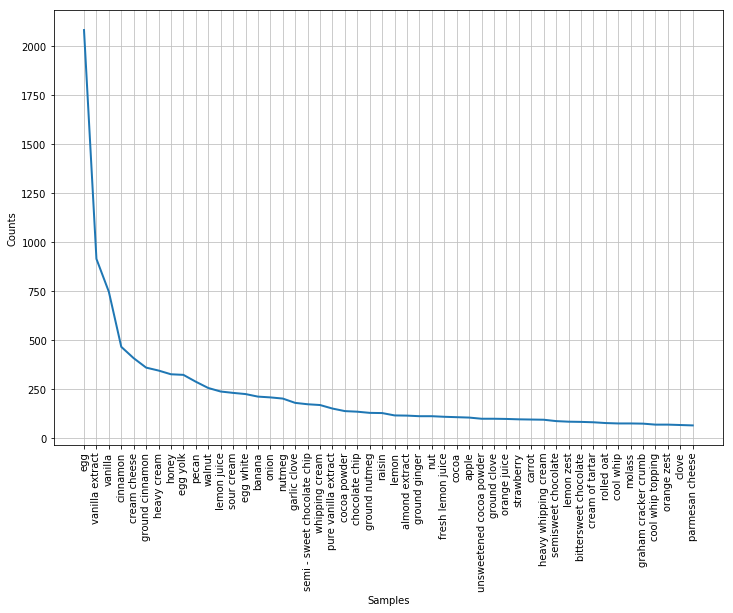

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12, 8))
# plt.ylim(0,120)
fdist.plot(50,cumulative=False)
# plt.ylim(0,30)
# plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
import string

from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
np.random.seed(23)

In [ ]:
stopwords_list  = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list +=

In [ ]:
stopwords_list[-20:]